In [1]:
from subprocess import check_output
print(check_output(["ls", "../input/instacart-market-basket-analysis"]).decode("utf8"))

aisles.csv.zip
departments.csv.zip
order_products__prior.csv.zip
order_products__train.csv.zip
orders.csv.zip
products.csv.zip
sample_submission.csv.zip



In [2]:
import os
import zipfile

for dirname, _, filenames in os.walk('/kaggle/input/instacart-market-basket-analysis/'):
    for filename in filenames:        
        archive = zipfile.ZipFile(os.path.join(dirname, filename), mode='r')
        archive.extractall(path="/kaggle/working")
        archive.close()

print(check_output(["ls", "../working"]).decode("utf8"))

__MACOSX
__notebook_source__.ipynb
aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_submission.csv



In [3]:
import pandas as pd

order_products_train = pd.read_csv("../working/order_products__train.csv")
order_products_prior = pd.read_csv("../working/order_products__prior.csv")
orders = pd.read_csv("../working/orders.csv")
products = pd.read_csv("../working/products.csv")
aisles = pd.read_csv("../working/aisles.csv")
departments = pd.read_csv("../working/departments.csv")
sample_submission = pd.read_csv("../working/sample_submission.csv")

print('*** df 생성 완료 ***')

*** df 생성 완료 ***


In [ ]:
orders

In [ ]:
orders[orders['order_id']==1]

In [ ]:
order_products_train[order_products_train['order_id']==1]

In [ ]:
orders.eval_set.unique()

In [4]:
filter_orders = orders[(orders['eval_set'] == 'train') | (orders['eval_set'] == 'prior')]
filter_orders.eval_set.unique()

array(['prior', 'train'], dtype=object)

In [ ]:
print(filter_orders.order_id.nunique())
order_products_train.order_id.nunique() + order_products_prior.order_id.nunique() 

## Merge data set : products + aisles + departments

In [5]:
merged_products = pd.merge(products, aisles, on='aisle_id', how='left')
merged_products = pd.merge(merged_products, departments, on='department_id', how='left')
merged_products = merged_products.reindex(columns=['product_id','product_name','aisle_id','aisle','department_id','department'])
merged_products.head()

,product_id,product_name,aisle_id,aisle,department_id,department
0,1,Chocolate Sandwich Cookies,61,cookies cakes,19,snacks
1,2,All-Seasons Salt,104,spices seasonings,13,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,tea,7,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals,1,frozen
4,5,Green Chile Anytime Sauce,5,marinades meat preparation,13,pantry


## Merge data set : order_products_train + order_products_prior

In [6]:
train_prior = pd.concat([order_products_train, order_products_prior])
train_prior

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


## Merge data set : train_prior + merged_products

In [7]:
train_prior = pd.merge(train_prior, merged_products, on='product_id', how='left')
train_prior

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,aisle,department_id,department
0,1,49302,1,1,Bulgarian Yogurt,120,yogurt,16,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,other creams cheeses,16,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,fresh vegetables,4,produce
3,1,49683,4,0,Cucumber Kirby,83,fresh vegetables,4,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,canned meat seafood,15,canned goods
...,...,...,...,...,...,...,...,...,...
33819101,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,dish detergents,17,household
33819102,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,crackers,19,snacks
33819103,3421083,4600,8,0,All Natural French Toast Sticks,52,frozen breakfast,1,frozen
33819104,3421083,24852,9,1,Banana,24,fresh fruits,4,produce


In [8]:
del merged_products

## Merge data set : filter_orders + merged_products

In [ ]:
print(filter_orders.shape)
train_prior.shape

In [9]:
merged_df = train_prior.merge(filter_orders, left_on='order_id', right_on='order_id', how='outer')
merged_df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,aisle,department_id,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,yogurt,16,dairy eggs,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,other creams cheeses,16,dairy eggs,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,fresh vegetables,4,produce,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,fresh vegetables,4,produce,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,canned meat seafood,15,canned goods,112108,train,4,4,10,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,dish detergents,17,household,25247,prior,24,2,6,21.0
33819102,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,crackers,19,snacks,25247,prior,24,2,6,21.0
33819103,3421083,4600,8,0,All Natural French Toast Sticks,52,frozen breakfast,1,frozen,25247,prior,24,2,6,21.0
33819104,3421083,24852,9,1,Banana,24,fresh fruits,4,produce,25247,prior,24,2,6,21.0


In [10]:
del order_products_train
del order_products_prior
del orders
del products
del aisles
del departments
del sample_submission

In [ ]:
print(merged_df.isnull().sum())
merged_df.info()

In [ ]:
merged_df.order_id.nunique()

In [11]:
# 메모리 문제로 계속 에러가 발생하여, 우선 1/3 데이터만 활용

merged_df = merged_df.head(10000000)

## 불필요한 칼럼 제거 

In [12]:
filtered = merged_df.drop(['add_to_cart_order','reordered','user_id','eval_set','order_number','order_dow','order_hour_of_day','days_since_prior_order','product_id','product_name','aisle_id','aisle','department_id'], axis = 1)
filtered

,order_id,department
0,1,dairy eggs
1,1,dairy eggs
2,1,produce
3,1,produce
4,1,canned goods
...,...,...
9999995,909524,bakery
9999996,909524,dairy eggs
9999997,909524,dairy eggs
9999998,909524,dairy eggs


In [13]:
onehot_filtered = pd.get_dummies(filtered)
onehot_filtered

,order_id,department_alcohol,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,...,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,909524,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999996,909524,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9999997,909524,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9999998,909524,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
onehot_filtered.groupby(by=['order_id']).sum()
onehot_filtered

,order_id,department_alcohol,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,...,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,909524,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999996,909524,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9999997,909524,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9999998,909524,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## 상관계수

In [19]:
df = onehot_filtered.corr()
df

,order_id,department_alcohol,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,...,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks
order_id,1.000000,-0.002738,-0.005485,-0.001447,-0.000553,-0.000909,-0.000662,0.001116,-0.006362,-0.000422,...,0.005311,0.000616,0.000117,0.018015,0.001602,0.000972,0.004082,0.000867,0.001481,-0.002477
department_alcohol,-0.002738,1.000000,-0.007784,-0.013226,-0.020531,-0.010209,-0.002212,-0.012628,-0.030460,-0.012502,...,-0.010533,-0.006281,-0.010208,-0.003521,-0.002295,-0.016950,-0.008147,-0.003786,-0.044009,-0.021320
department_babies,-0.005485,-0.007784,1.000000,-0.022026,-0.034191,-0.017000,-0.003683,-0.021029,-0.050725,-0.020820,...,-0.017540,-0.010459,-0.016999,-0.005863,-0.003822,-0.028227,-0.013567,-0.006305,-0.073289,-0.035504
department_bakery,-0.001447,-0.013226,-0.022026,1.000000,-0.058092,-0.028885,-0.006258,-0.035730,-0.086186,-0.035374,...,-0.029802,-0.017771,-0.028882,-0.009962,-0.006494,-0.047959,-0.023051,-0.010713,-0.124523,-0.060323
department_beverages,-0.000553,-0.020531,-0.034191,-0.058092,1.000000,-0.044838,-0.009714,-0.055464,-0.133788,-0.054912,...,-0.046262,-0.027586,-0.044834,-0.015465,-0.010080,-0.074447,-0.035782,-0.016630,-0.193298,-0.093640
department_breakfast,-0.000909,-0.010209,-0.017000,-0.028885,-0.044838,1.000000,-0.004830,-0.027578,-0.066523,-0.027304,...,-0.023003,-0.013717,-0.022293,-0.007690,-0.005012,-0.037017,-0.017792,-0.008269,-0.096113,-0.046560
department_bulk,-0.000662,-0.002212,-0.003683,-0.006258,-0.009714,-0.004830,1.000000,-0.005975,-0.014412,-0.005915,...,-0.004983,-0.002972,-0.004830,-0.001666,-0.001086,-0.008020,-0.003854,-0.001791,-0.020822,-0.010087
department_canned goods,0.001116,-0.012628,-0.021029,-0.035730,-0.055464,-0.027578,-0.005975,1.000000,-0.082287,-0.033774,...,-0.028454,-0.016967,-0.027576,-0.009512,-0.006200,-0.045789,-0.022008,-0.010229,-0.118889,-0.057594
department_dairy eggs,-0.006362,-0.030460,-0.050725,-0.086186,-0.133788,-0.066523,-0.014412,-0.082287,1.000000,-0.081468,...,-0.068634,-0.040927,-0.066517,-0.022944,-0.014955,-0.110451,-0.053086,-0.024673,-0.286779,-0.138926
department_deli,-0.000422,-0.012502,-0.020820,-0.035374,-0.054912,-0.027304,-0.005915,-0.033774,-0.081468,1.000000,...,-0.028170,-0.016798,-0.027301,-0.009417,-0.006138,-0.045334,-0.021789,-0.010127,-0.117706,-0.057021


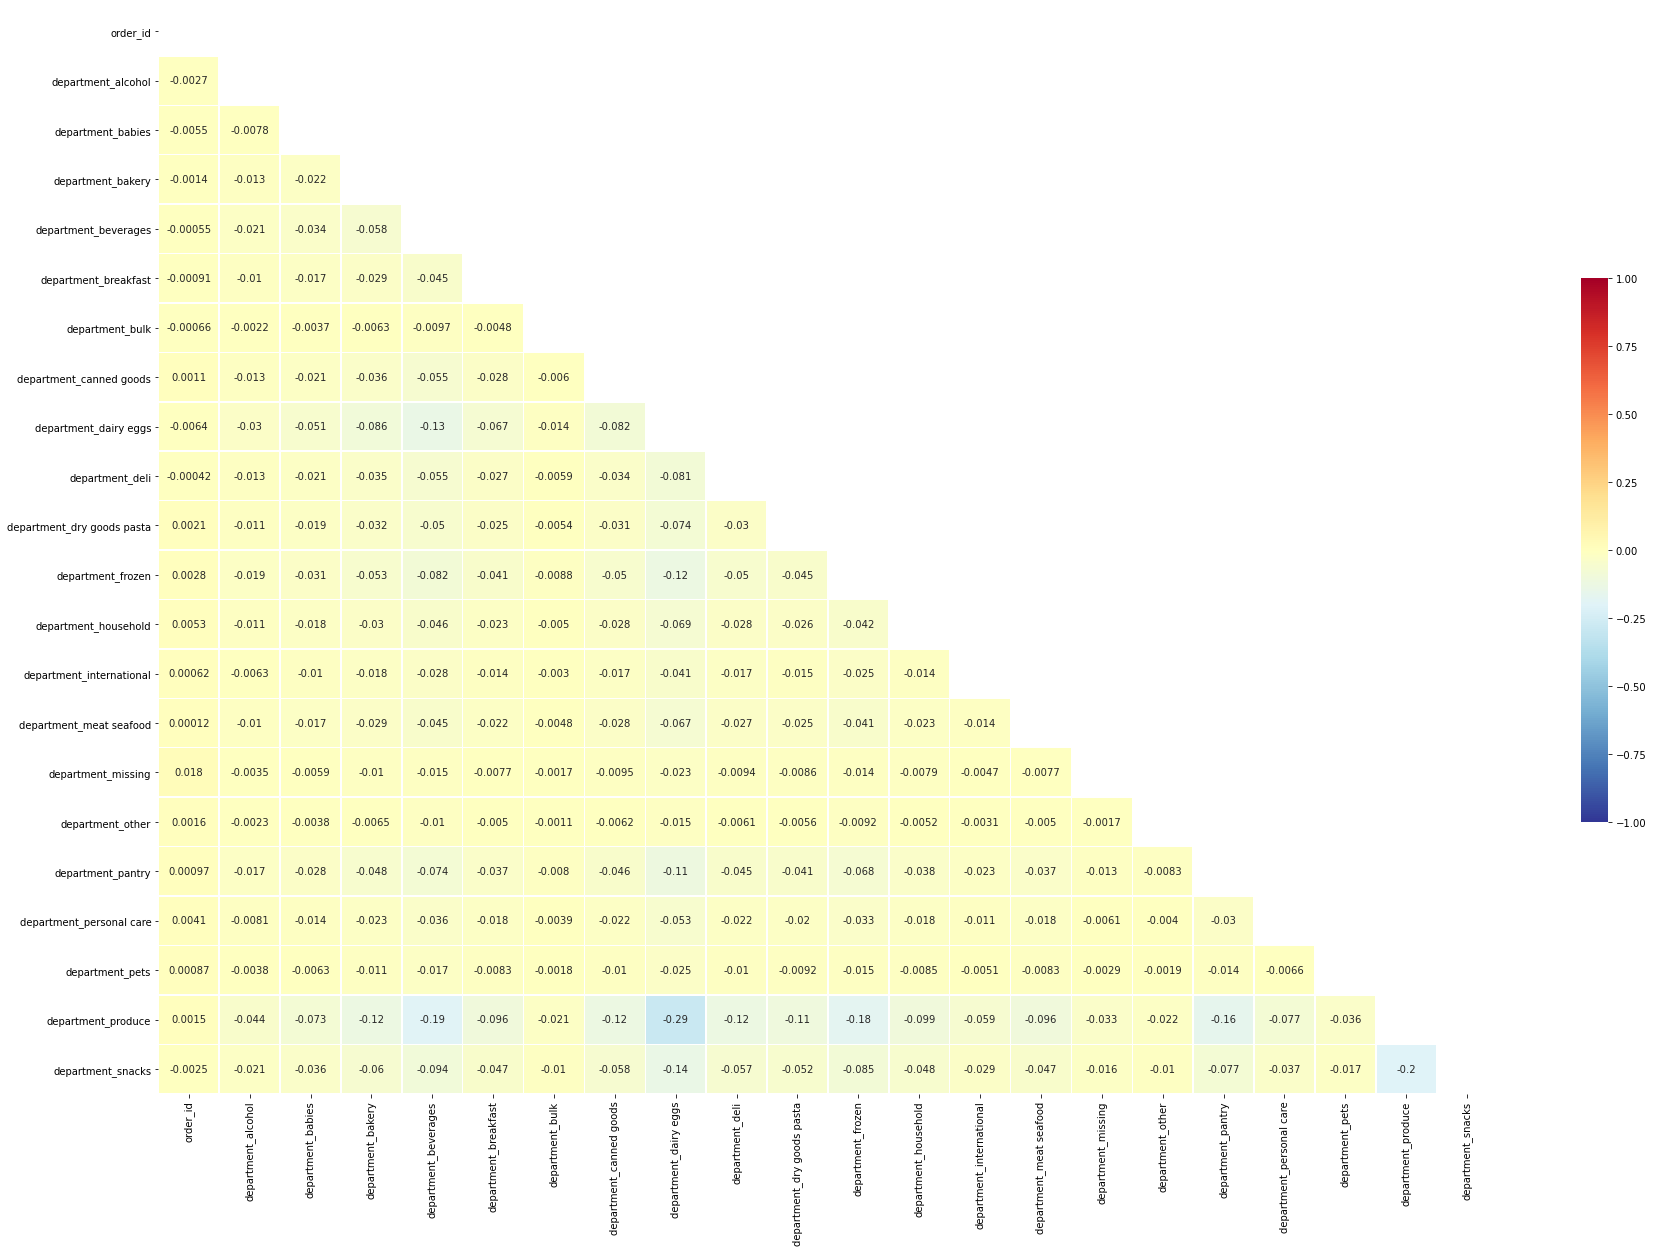

In [26]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns   
import numpy as np

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(25,20) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()